**Kwadratury adaptacyjne**

In [7]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.integrate import quad_vec
from scipy.special import roots_legendre

**Zadanie 1.**

In [8]:
# Data
t_range = np.array(range(0, -15, -1))
tolerances = 10.0**t_range

In [9]:
# Methods from the 6th laboratory
def trapezoid(y, x):
    return scipy.integrate.trapezoid(y=y, x=x)

def simpson(y, x):
    return scipy.integrate.simpson(y=y, x=x)

def gauss_legendre(f, a, b, n):
    x, w = roots_legendre(n)
    x = 0.5*(b-a)*x + 0.5 * (b + a)
    w = 0.5*(b-a)*w
    approximation = np.sum(w*f(x))
    return approximation

# Procedure definition
m_range = np.array(range(1, 26))
m_range_ = np.array(range(0, 10))

def Procedure(f, a, b, true_value):
    rectangle_values = []
    trapezoid_values = []
    simpson_values = []
    errors_GL = []
    errors_gk = []
    errors_trap2 = []
    eval_count_gk = []
    eval_count_trap = []

    for m in m_range:
        n = 2**m+1
        h = (b-a)/n
        x_rect = np.array([a+h*(i + 0.5) for i in range(n)])
        x_trap = np.linspace(a, b, num=n)
        x_simp = np.linspace(a, b, num=n)
        y_rect = f(x_rect)
        y_trap = f(x_trap)
        y_simp = f(x_simp)
        rectangle_values.append(np.sum(h*y_rect))
        trapezoid_values.append(trapezoid(y_trap, x_trap))
        simpson_values.append(simpson(y_simp, x_simp))

    for m in m_range_:
        n = 2**m+1
        value = gauss_legendre(f, a, b, n)
        error = np.abs((value-true_value)/true_value)
        errors_GL.append(error)

    # Adaptive trapezoid quadrature
    for t in tolerances:
        value, _, info = quad_vec(f, a, b, epsabs=t, full_output=True, quadrature='trapezoid')
        error = np.abs((value-true_value)/true_value)
        errors_trap2.append(error)
        eval_count_trap.append(info.neval)

    # Adaptive Gauss-Kronrod quadrature
    for t in tolerances:
        value, _, info = quad_vec(f, a, b, epsabs=t, full_output=True, quadrature='gk21')
        error = np.abs((value-true_value)/true_value)
        errors_gk.append(error)
        eval_count_gk.append(info.neval)

    errors_rect = np.abs((np.array(rectangle_values) - true_value) / true_value)
    errors_trap1 = np.abs((np.array(trapezoid_values) - true_value) / true_value)
    errors_simp = np.abs((np.array(simpson_values) - true_value) / true_value)

    plt.title("Quadratures comparison")
    plt.plot((2**m_range+1)/(b-a) + 1, errors_rect, color='blue', label='rectangle')
    plt.plot((2**m_range+1)/(b-a) + 1, errors_trap1, color='red', label='trapezoid')
    plt.plot((2**m_range+1)/(b-a) + 1, errors_simp, color='green', label='Simpson')
    plt.plot((2**m_range_+1)/(b-a) + 1, errors_GL, color='purple', label='Gauss-Legendre')
    plt.plot(eval_count_trap, errors_trap2, color='orange', label='adaptive trapezoid quadrature')
    plt.plot(eval_count_gk, errors_gk, color='black', label='Gauss-Kronrod')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('evaluation count')
    plt.ylabel('relative error')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
            fancybox=True, shadow=True, ncol=1)
    plt.grid()
    plt.show()

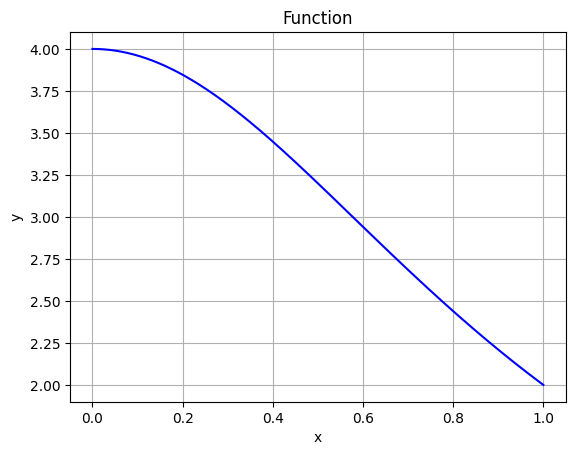

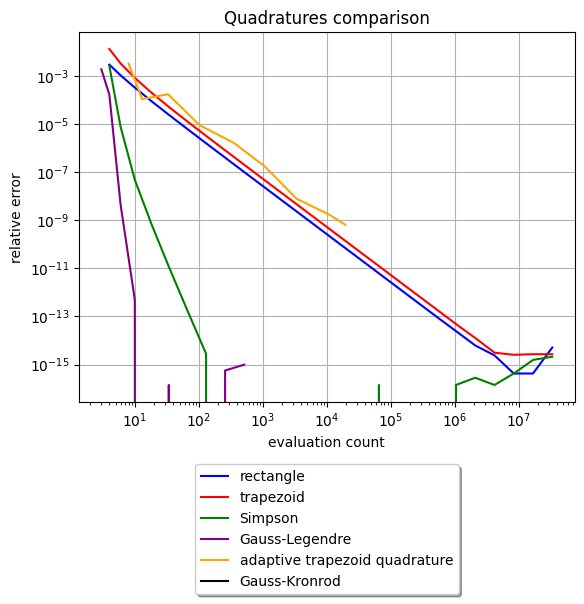

In [10]:
f = lambda x: 4/(1+x*x)
a = 0.0
b = 1.0
true_value = np.pi

# Function Plot
x = np.linspace(a, b, 1000)
plt.title("Function")
plt.plot(x, f(x), color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

# Errors plot
Procedure(f, a, b, true_value)

**Zadanie 2.**

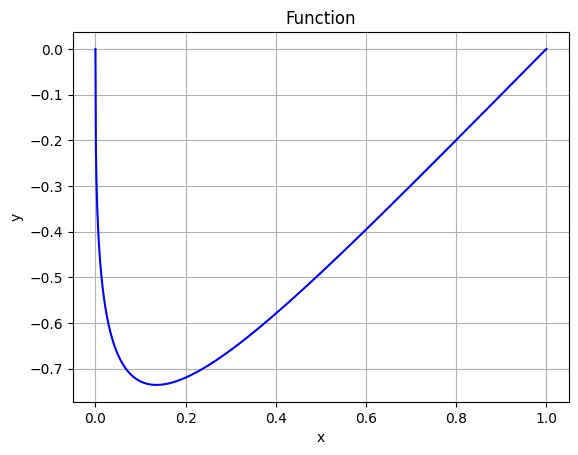

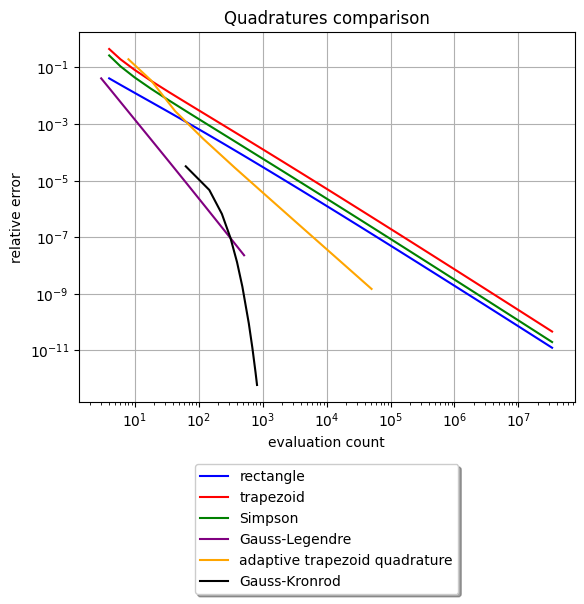

In [11]:
g = lambda x: np.sqrt(x) * np.log(x)
a = 0.000000000000000001
b = 0.999999999999999999
true_value = -4/9

# Function Plot
x = np.linspace(a, b, 1000)
plt.title("Function")
plt.plot(x, g(x), color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

# Errors plot
Procedure(g, a, b, true_value)

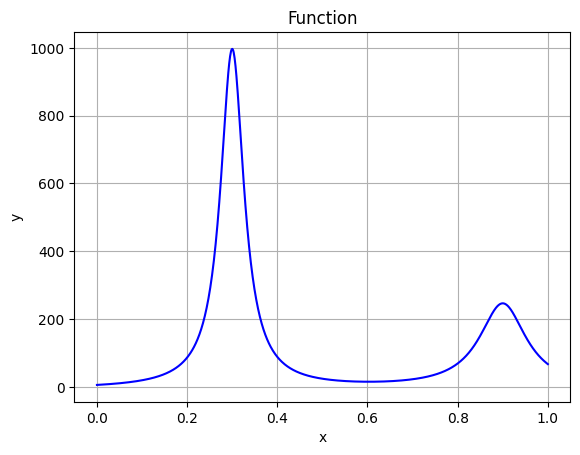

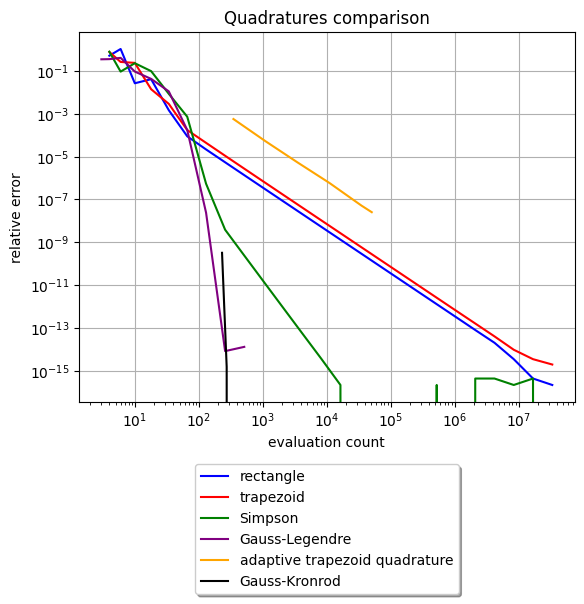

In [12]:
h = lambda x, a, b: 1/((x-0.3)**2 + a) + 1/((x-0.9)**2 + b) - 6
a = 0.0
b = 1.0
t = lambda x0, a: (1/np.sqrt(a)) * (np.arctan((1-x0)/np.sqrt(a)) + np.arctan(x0/np.sqrt(a)))
c = 0.001
d = 0.004
true_value = t(0.3, c) + t(0.9, d) - 6

# Function Plot
x = np.linspace(a, b, 1000)
plt.title("Function")
plt.plot(x, h(x, c, d), color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

# Errors plot
Procedure(lambda x: h(x, c, d), a, b, true_value)